# Insightface

- Website: https://insightface.ai/
- Github: https://github.com/deepinsight/insightface
- Github Python package and Models: https://github.com/deepinsight/insightface/tree/master/python-package

In [1]:
import numpy as np
import cv2 # opencv
from PIL import Image

In [2]:
import insightface

### 1. Configure Insight Face Model

| Name          | Detection Model | Recognition Model    | Alignment    | Attributes | Model-Size | Link                                                         | Auto |
| ------------- | --------------- | -------------------- | ------------ | ---------- | ---------- | ------------------------------------------------------------ | ------------- |
| antelopev2    | SCRFD-10GF      | ResNet100@Glint360K  | 2d106 & 3d68 | Gender&Age | 407MB      | [link](https://drive.google.com/file/d/18wEUfMNohBJ4K3Ly5wpTejPfDzp-8fI8/view?usp=sharing) | N             |
| **buffalo_l** | SCRFD-10GF      | ResNet50@WebFace600K | 2d106 & 3d68 | Gender&Age | 326MB      | [link](https://drive.google.com/file/d/1qXsQJ8ZT42_xSmWIYy85IcidpiZudOCB/view?usp=sharing) | Y             |
| buffalo_m     | SCRFD-2.5GF     | ResNet50@WebFace600K | 2d106 & 3d68 | Gender&Age | 313MB      | [link](https://drive.google.com/file/d/1net68yNxF33NNV6WP7k56FS6V53tq-64/view?usp=sharing) | N             |
| buffalo_s     | SCRFD-500MF     | MBF@WebFace600K      | 2d106 & 3d68 | Gender&Age | 159MB      | [link](https://drive.google.com/file/d/1pKIusApEfoHKDjeBTXYB3yOQ0EtTonNE/view?usp=sharing) | N             |
| buffalo_sc    | SCRFD-500MF     | MBF@WebFace600K      | -            | -          | 16MB       | [link](https://drive.google.com/file/d/19I-MZdctYKmVf3nu5Da3HS6KH5LBfdzG/view?usp=sharing) | N             |



Recognition Accuracy:

| Name      | MR-ALL | African | Caucasian | South Asian | East Asian | LFW   | CFP-FP | AgeDB-30 | IJB-C(E4) |
| :-------- | ------ | ------- | --------- | ----------- | ---------- | ----- | ------ | -------- | --------- |
| buffalo_l | 91.25  | 90.29   | 94.70     | 93.16       | 74.96      | 99.83 | 99.33  | 98.23    | 97.25     |
| buffalo_s | 71.87  | 69.45   | 80.45     | 73.39       | 51.03      | 99.70 | 98.00  | 96.58    | 95.02     |



In [3]:
from insightface.app import FaceAnalysis

In [4]:
# buffalo_l model
app_l = FaceAnalysis(name='buffalo_l',
                     root='insightface_model',
                     providers=['CPUExecutionProvider'])
# ['CUDAExecutionProvider', 'CPUExecutionProvider']

app_l.prepare(ctx_id=0, det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [5]:
# load buffalo sc model
app_sc = FaceAnalysis(name='buffalo_sc',
                      root='insightface_model')
# providers=['CPUExecutionProvider']
app_sc.prepare(ctx_id=0, det_size=(640,640))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


### 2. Load Image 

In [19]:
import cv2

img = cv2.imread('test_image_1.jpg')
cv2.imshow('image', img)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)


-1

### 3. Apply image to insightface model and get results

In [7]:
results_l = app_l.get(img)  # get results from buffalo large model
type(results_l), len(results_l) 

/Users/abhignaragala/anaconda3/lib/python3.11/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


(list, 1)

In [8]:
print (results_l)

[{'bbox': array([537.9714 , 146.17056, 972.70654, 701.48334], dtype=float32), 'kps': array([[653.73474, 377.78696],
       [861.23315, 370.75763],
       [764.3608 , 484.4311 ],
       [686.14404, 587.32623],
       [841.12036, 581.6985 ]], dtype=float32), 'det_score': 0.87153244, 'landmark_3d_68': array([[ 5.2603809e+02,  3.8427246e+02,  2.6378705e+02],
       [ 5.3971075e+02,  4.4388873e+02,  2.5711386e+02],
       [ 5.5530322e+02,  5.0380997e+02,  2.4560426e+02],
       [ 5.7150336e+02,  5.5873474e+02,  2.2454018e+02],
       [ 5.9173260e+02,  6.0678168e+02,  1.8022769e+02],
       [ 6.2194940e+02,  6.4137476e+02,  1.4064888e+02],
       [ 6.5926080e+02,  6.6737061e+02,  1.0889226e+02],
       [ 7.0286267e+02,  6.8942346e+02,  7.1261452e+01],
       [ 7.6830585e+02,  7.0647870e+02,  5.5524502e+01],
       [ 8.3072583e+02,  6.8552252e+02,  7.6795135e+01],
       [ 8.7631683e+02,  6.5618884e+02,  1.1844683e+02],
       [ 9.1365070e+02,  6.2103754e+02,  1.6082312e+02],
       [ 9.33961

In [9]:
type(results_l), len(results_l) #the number of faces detected

(list, 1)

In [10]:
results_l[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

In [11]:
results_l[0]['gender']
results_l[0]['age']

27

In [12]:
# draw the bounding box of each detected face
img_copy = img.copy()
gender_encode = ['Female','Male']
for res in results_l:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    
    # draw rectangle
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),(0,255,0),2)
    
    # key points
    kps = res['kps'].astype(int)
    for k1, k2 in kps:
        cv2.circle(img_copy,(k1,k2),2,(0,255,255),-1)
        
    # detection score
    score = "score: {}%".format(int(res['det_score']*100))
    cv2.putText(img_copy,score,(x1, y1),cv2.FONT_HERSHEY_DUPLEX,0.5,(255,0,255))
    
    # age and gender
    gender = gender_encode[res['gender']]
    age = res['age']
    age_gender = f"{gender}::{age}"
    
    cv2.putText(img_copy,age_gender,(x1, y2+10),cv2.FONT_HERSHEY_DUPLEX,0.5,(255,0,255))
    
cv2.imshow('bbox',img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
import cv2

img = cv2.imread('test_image_1.jpg')
cv2.imshow('image', img)

cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)



-1

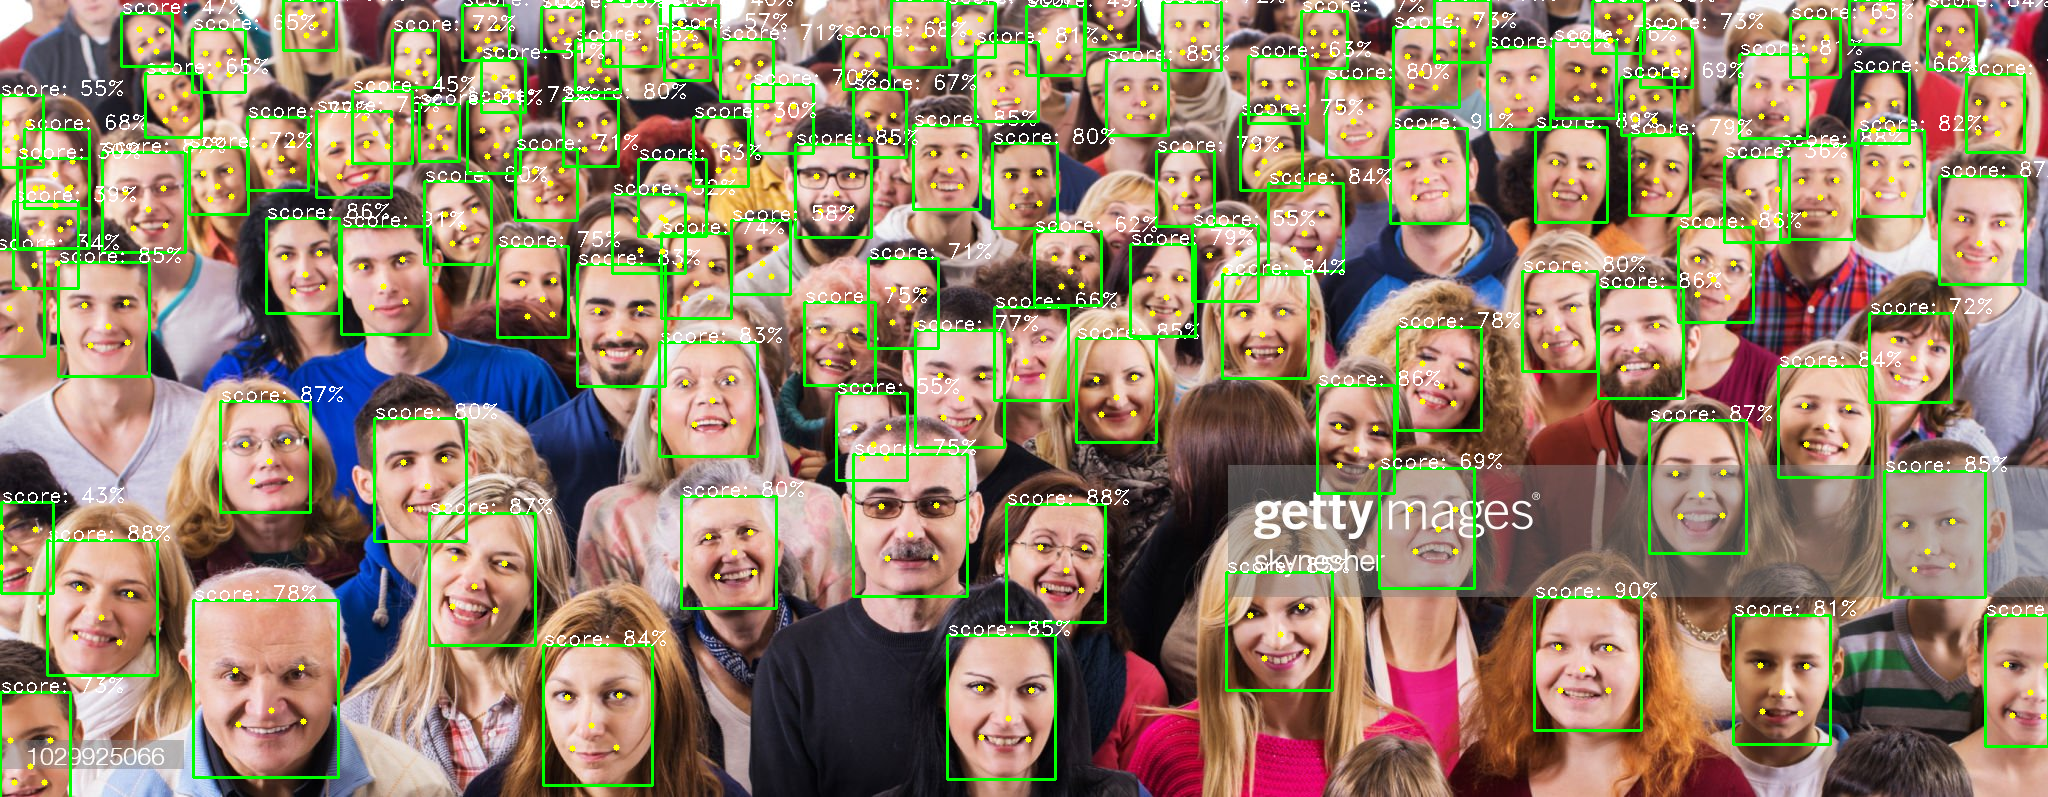

In [20]:
Image.fromarray(img_copy[:,:,(2,1,0)])

### Buffalo - S model

In [14]:
# load buffalo sc model
app_sc = FaceAnalysis(name='buffalo_sc',
                      root='insightface_model',
                      providers=['CPUExecutionProvider'])
app_sc.prepare(ctx_id=0, det_size=(640,640),det_thresh=0.3)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [15]:
results_sc = app_sc.get(img)

In [16]:
len(results_sc)

114

In [17]:
img_copy = img.copy()
for res in results_sc:
    # bounding box
    x1, y1, x2, y2 = res['bbox'].astype(int)
    cv2.rectangle(img_copy,(x1,y1),(x2,y2),(0,255,0),2)
    
    # kps
    kps = res['kps'].astype(int)
    for kp in kps:
        cv2.circle(img_copy,kp,3,(0,255,255),-1)
        
    # detection score
    score = "score: {}%".format(int(res['det_score']*100))
    cv2.putText(img_copy,score,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,(255,255,255),1)
    
cv2.imshow('image',img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

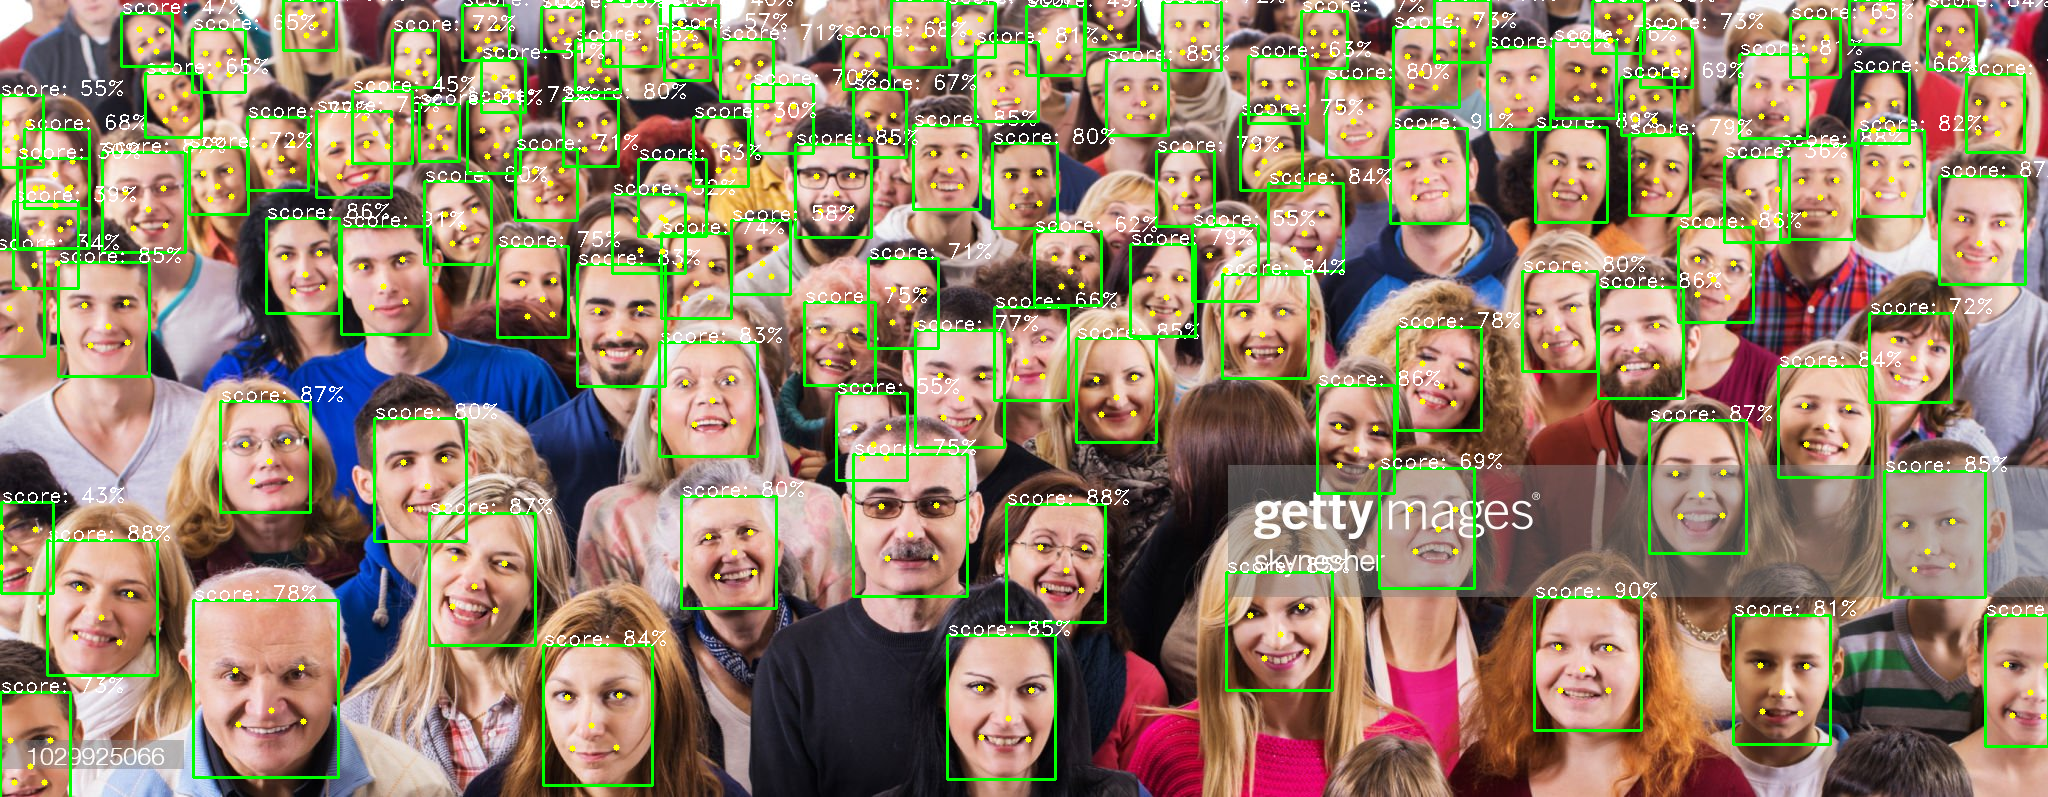

In [18]:
Image.fromarray(img_copy[:,:,(2,1,0)])

### [END](https://www.udemy.com/user/freeai-space/)
---